In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_classification(n_classes=2, n_samples=1000, n_features=10, n_informative=7)

In [3]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=245)

In [4]:
model = LogisticRegression()

In [5]:
model.fit(X_tr, y_tr)

LogisticRegression()

In [6]:
y_pr = model.predict(X_te)

In [7]:
accuracy_score(y_te, y_pr)

0.77

In [8]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       138
           1       0.78      0.81      0.79       162

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [9]:
confusion_matrix(y_te, y_pr)

array([[100,  38],
       [ 31, 131]])

In [10]:
y_prob = model.predict_proba(X_te)[:, 1]

In [11]:
y_prob

array([0.83818286, 0.05565526, 0.98846046, 0.42170449, 0.81629122,
       0.60798716, 0.78058195, 0.15800615, 0.6719508 , 0.33827242,
       0.61042928, 0.5970741 , 0.86635267, 0.06824928, 0.90150249,
       0.75203695, 0.3156795 , 0.36042001, 0.67206064, 0.28558526,
       0.29620423, 0.97695847, 0.83725179, 0.6005242 , 0.76154921,
       0.97000687, 0.23483222, 0.41638694, 0.62717937, 0.71740844,
       0.62512918, 0.34282024, 0.77360068, 0.33926364, 0.68576276,
       0.27815955, 0.0317851 , 0.77099621, 0.17216766, 0.79649512,
       0.55008112, 0.38819659, 0.68934176, 0.20408932, 0.73545544,
       0.98302381, 0.53624695, 0.20051917, 0.89350466, 0.05866761,
       0.11336044, 0.14090799, 0.97167769, 0.10257441, 0.24424196,
       0.71798486, 0.39638413, 0.42451908, 0.84030846, 0.13137199,
       0.27055218, 0.19596208, 0.74532473, 0.97236373, 0.60281048,
       0.79622841, 0.22353684, 0.41015615, 0.43269001, 0.37078932,
       0.09743885, 0.64565406, 0.5439067 , 0.17749699, 0.87385

In [12]:
fpr, tpr, threshold = roc_curve(y_te, y_prob)



In [13]:
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , 0.00724638, 0.00724638,
        0.01449275, 0.01449275, 0.02173913, 0.02173913, 0.02898551,
        0.02898551, 0.03623188, 0.03623188, 0.04347826, 0.04347826,
        0.05072464, 0.05072464, 0.05797101, 0.05797101, 0.07246377,
        0.07246377, 0.07971014, 0.07971014, 0.0942029 , 0.0942029 ,
        0.10144928, 0.10144928, 0.10869565, 0.10869565, 0.11594203,
        0.11594203, 0.14492754, 0.14492754, 0.15217391, 0.15217391,
        0.17391304, 0.17391304, 0.18115942, 0.18115942, 0.19565217,
        0.19565217, 0.20289855, 0.20289855, 0.2173913 , 0.2173913 ,
        0.23188406, 0.23188406, 0.24637681, 0.24637681, 0.26086957,
        0.26086957, 0.26811594, 0.26811594, 0.27536232, 0.27536232,
        0.29710145, 0.29710145, 0.3115942 , 0.3115942 , 0.31884058,
        0.31884058, 0.32608696, 0.32608696, 0.34057971, 0.34057971,
        0.34782609, 0.34782609, 0.37681159, 0.37681159, 0.38405797,
        0.38405797, 0.39130435, 0.39130435, 0.39

In [14]:
auc_score = roc_auc_score(y_te, y_prob)

In [15]:
auc_score

np.float64(0.8312757201646089)

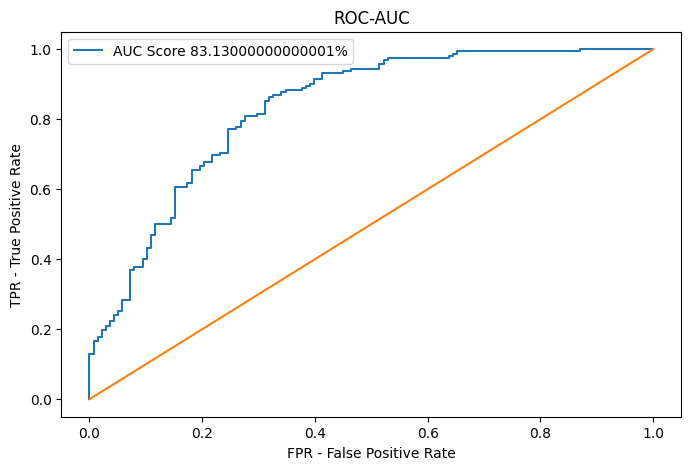

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC Score {np.round(auc_score, decimals=4)*100}%")
plt.plot([0, 1], [0, 1])
plt.title("ROC-AUC")
plt.xlabel("FPR - False Positive Rate")
plt.ylabel("TPR - True Positive Rate")
plt.legend()
plt.show()

In [18]:
y_prob

array([0.83818286, 0.05565526, 0.98846046, 0.42170449, 0.81629122,
       0.60798716, 0.78058195, 0.15800615, 0.6719508 , 0.33827242,
       0.61042928, 0.5970741 , 0.86635267, 0.06824928, 0.90150249,
       0.75203695, 0.3156795 , 0.36042001, 0.67206064, 0.28558526,
       0.29620423, 0.97695847, 0.83725179, 0.6005242 , 0.76154921,
       0.97000687, 0.23483222, 0.41638694, 0.62717937, 0.71740844,
       0.62512918, 0.34282024, 0.77360068, 0.33926364, 0.68576276,
       0.27815955, 0.0317851 , 0.77099621, 0.17216766, 0.79649512,
       0.55008112, 0.38819659, 0.68934176, 0.20408932, 0.73545544,
       0.98302381, 0.53624695, 0.20051917, 0.89350466, 0.05866761,
       0.11336044, 0.14090799, 0.97167769, 0.10257441, 0.24424196,
       0.71798486, 0.39638413, 0.42451908, 0.84030846, 0.13137199,
       0.27055218, 0.19596208, 0.74532473, 0.97236373, 0.60281048,
       0.79622841, 0.22353684, 0.41015615, 0.43269001, 0.37078932,
       0.09743885, 0.64565406, 0.5439067 , 0.17749699, 0.87385

In [19]:
y_pr_655_threshold = np.array([0 if i < 0.655 else 1 for i in y_prob])

In [20]:
y_pr_655_threshold

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [21]:
accuracy_score(y_te, y_pr_655_threshold)

0.7133333333333334

In [22]:
print(classification_report(y_te, y_pr_655_threshold))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       138
           1       0.80      0.62      0.70       162

    accuracy                           0.71       300
   macro avg       0.73      0.72      0.71       300
weighted avg       0.73      0.71      0.71       300



In [24]:
confusion_matrix(y_te, y_pr_67_threshold)

NameError: name 'y_pr_67_threshold' is not defined

In [25]:
training_score = model.score(X_tr, y_tr)
training_score

0.73

In [26]:
testing_score = accuracy_score(y_te, y_pr)
testing_score

0.77

#cross validation

In [27]:
kf = KFold(n_splits=10)

In [28]:
cvs = cross_val_score(estimator=LogisticRegression(), X=X_tr, y=y_tr, cv=kf,
                     n_jobs=-1, verbose=True, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


In [29]:
cvs

array([0.7       , 0.7       , 0.72857143, 0.75714286, 0.82857143,
       0.71428571, 0.77142857, 0.58571429, 0.72857143, 0.72857143])

In [30]:
cross_validation_score = cvs.mean()

In [31]:
cross_validation_score

np.float64(0.7242857142857144)